<a href="https://colab.research.google.com/github/suelen-prs/EBAC/blob/main/mod17_Arvores_II_Tarefa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import ConfusionMatrixDisplay
from sklearn.metrics         import confusion_matrix

In [2]:
_features = 'features.txt'
_subject_train = 'subject_train.txt'
_X_train = 'X_train.txt'
_subject_test = 'subject_test.txt'
_X_test = 'X_test.txt'
_y_train = 'y_train.txt'
_y_test = 'y_test.txt'

In [3]:
features = (pd.read_csv(filepath_or_buffer=_features, sep='?', header=None).squeeze('columns'))
features

0                           1 tBodyAcc-mean()-X
1                           2 tBodyAcc-mean()-Y
2                           3 tBodyAcc-mean()-Z
3                            4 tBodyAcc-std()-X
4                            5 tBodyAcc-std()-Y
                         ...                   
556        557 angle(tBodyGyroMean,gravityMean)
557    558 angle(tBodyGyroJerkMean,gravityMean)
558                    559 angle(X,gravityMean)
559                    560 angle(Y,gravityMean)
560                    561 angle(Z,gravityMean)
Name: 0, Length: 561, dtype: object

In [4]:
subject_train = (pd.read_csv(filepath_or_buffer=_subject_train, header=None).squeeze('columns'))
subject_train

0        1
1        1
2        1
3        1
4        1
        ..
7347    30
7348    30
7349    30
7350    30
7351    30
Name: 0, Length: 7352, dtype: int64

In [5]:
X_train = (pd.read_csv(filepath_or_buffer=_X_train, header=None, names=features, delim_whitespace=True).assign(subject_train=subject_train))
X_train.set_index(keys='subject_train', drop=True, append=True, inplace=True)
X_train

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [6]:
print('Quantidade de valores ausentes em X_train:', X_train.isna().sum().sum())

Quantidade de valores ausentes em X_train: 0


In [7]:
subject_test = (pd.read_csv(filepath_or_buffer=_subject_test, header=None).squeeze('columns'))

X_test = (pd.read_csv(filepath_or_buffer=_X_test, header=None, names=features, delim_whitespace=True).assign(subject_test=subject_test))
X_test.set_index(keys='subject_test', drop=True, append=True, inplace=True)
X_test

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [8]:
print('Quantidade de valores ausentes em X_test:', X_test.isna().sum().sum())

Quantidade de valores ausentes em X_test: 0


In [9]:
os.makedirs(name='./output', exist_ok=True)
X_train.to_csv(path_or_buf='./output/X_train.csv')
X_test.to_csv(path_or_buf='./output/X_test.csv')

In [10]:
X_train = pd.read_csv('./output/X_train.csv', index_col=['Unnamed: 0', 'subject_train'])
X_test = pd.read_csv('./output/X_test.csv', index_col=['Unnamed: 0', 'subject_test'])

### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [11]:
X_train = X_train.iloc[:,:3]
X_test = X_test.iloc[:,:3]

y_train = (pd.read_csv(filepath_or_buffer=_y_train, header=None).squeeze('columns'))
y_test = (pd.read_csv(filepath_or_buffer=_y_test, header=None).squeeze('columns'))

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7352, 3)
y_train: (7352,)
X_test: (2947, 3)
y_test: (2947,)


In [12]:
clf = DecisionTreeClassifier(min_samples_leaf=20,
                             random_state=42)
path = clf.cost_complexity_pruning_path(X=X_train,
                                        y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

print('Quantidade de ccp_alphas:', ccp_alphas.size)

Quantidade de ccp_alphas: 233


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [13]:
clf = DecisionTreeClassifier(random_state=42)

grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

grid = GridSearchCV(estimator=clf,
                    param_grid=grid_parametros,
                    cv=10,
                    verbose=1)
grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by='rank_test_score')

Fitting 10 folds for each of 24 candidates, totalling 240 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
15,0.073741,0.003353,0.002502,0.000169,0.000484,{'ccp_alpha': 0.00048384996698380874},0.415761,0.459239,0.419048,0.423129,0.419048,0.453061,0.462585,0.500680,0.496599,0.502041,0.455119,0.033541,1
16,0.071402,0.002289,0.002358,0.000103,0.000525,{'ccp_alpha': 0.0005252368321589738},0.434783,0.468750,0.434014,0.420408,0.413605,0.450340,0.458503,0.499320,0.492517,0.478912,0.455115,0.028153,2
19,0.083485,0.015208,0.002749,0.000589,0.000908,{'ccp_alpha': 0.0009075692497005922},0.456522,0.461957,0.453061,0.423129,0.416327,0.453061,0.457143,0.455782,0.500680,0.454422,0.453208,0.021517,3
17,0.072014,0.002376,0.002345,0.000047,0.000615,{'ccp_alpha': 0.00061543524669367},0.444293,0.468750,0.421769,0.420408,0.417687,0.450340,0.468027,0.474830,0.496599,0.463946,0.452665,0.025174,4
18,0.072397,0.002634,0.002381,0.000121,0.000731,{'ccp_alpha': 0.0007307808962765637},0.451087,0.466033,0.451701,0.410884,0.413605,0.453061,0.466667,0.461224,0.492517,0.457143,0.452392,0.023088,5
14,0.074252,0.003423,0.002640,0.000490,0.000449,{'ccp_alpha': 0.0004494670133357165},0.398098,0.464674,0.417687,0.425850,0.416327,0.454422,0.465306,0.491156,0.499320,0.488435,0.452128,0.033886,6
13,0.072483,0.003732,0.002426,0.000123,0.000396,{'ccp_alpha': 0.0003963708882518772},0.417120,0.461957,0.420408,0.419048,0.404082,0.451701,0.478912,0.454422,0.491156,0.484354,0.448316,0.029783,7
12,0.070420,0.001837,0.002399,0.000065,0.000343,{'ccp_alpha': 0.0003433675092034457},0.406250,0.460598,0.429932,0.401361,0.379592,0.450340,0.477551,0.446259,0.502041,0.489796,0.444372,0.038080,8
20,0.100999,0.006086,0.003121,0.000096,0.001193,{'ccp_alpha': 0.0011931198191755046},0.445652,0.478261,0.410884,0.413605,0.414966,0.443537,0.435374,0.444898,0.485714,0.442177,0.441507,0.024076,9
11,0.071299,0.003584,0.002429,0.000099,0.000306,{'ccp_alpha': 0.00030572297808887077},0.388587,0.444293,0.424490,0.385034,0.391837,0.462585,0.477551,0.443537,0.478912,0.451701,0.434853,0.034003,10


In [14]:
melhor_ccp = resultados.iloc[grid.best_index_]['param_ccp_alpha']

print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid.best_score_)
print('\t param_ccp_alpha:', melhor_ccp)


 rank_test_score vencedor:
	 mean_test_score: 0.45511904761904765
	 param_ccp_alpha: 0.00048384996698380874


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Parâmetro                    Valor
ccp_alpha                 0.000484
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.44451985069562266


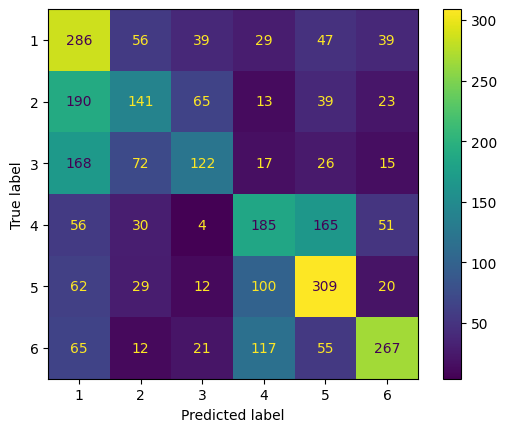

In [15]:

clf = DecisionTreeClassifier(random_state=42,
                             ccp_alpha=melhor_ccp
                            ).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(),
                   index=pd.Index(data=['Valor'],
                                  name='Parâmetro')
                  ).T,
      '\n')

print('Acurácia da árvore na base de testes:',
      clf.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                      X=X_test,
                                      y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [16]:
matriz = confusion_matrix(y_true=y_test,
                          y_pred=clf.predict(X_test))

acertos = [matriz[x,x] for x in range(6)]
erros   = sum(matriz) - acertos

pd.DataFrame(data={'acertos':acertos,
                   'erros':erros},
             index=pd.Index(data=list(range(1,7)),
                            name='classe')
            ).sort_values(by='erros',
                          ascending=False)

,acertos,erros
classe,,
1,286,541
5,309,332
4,185,276
2,141,199
6,267,148
3,122,141


In [17]:
print(y_train.value_counts().sort_index())

y_train_2 = pd.Series(data=(y_train == 2),
                      name='classe_2')
y_train_2.value_counts()

1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: 0, dtype: int64


False    6279
True     1073
Name: classe_2, dtype: int64

In [19]:
clf_2 = DecisionTreeClassifier(random_state=42)
path_2 = clf_2.cost_complexity_pruning_path(X=X_train,
                                            y=y_train)
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities
ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

clf_2 = DecisionTreeClassifier(random_state=42)
grid_2 = GridSearchCV(estimator=clf_2,
                      param_grid={'ccp_alpha': ccp_alphas_2[::10]},
                      cv=10,
                      verbose=1)
grid_2.fit(X_train, y_train)

resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2.sort_values(by='rank_test_score')

Fitting 10 folds for each of 83 candidates, totalling 830 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
75,0.073096,0.002439,0.002501,0.000262,0.000596,{'ccp_alpha': 0.0005963840294634635},0.448370,0.476902,0.421769,0.416327,0.423129,0.450340,0.468027,0.496599,0.497959,0.466667,0.456609,0.028314,1
73,0.072391,0.003075,0.002341,0.000034,0.000511,{'ccp_alpha': 0.0005112202485292369},0.433424,0.466033,0.434014,0.419048,0.412245,0.450340,0.458503,0.503401,0.496599,0.478912,0.455252,0.029709,2
72,0.072097,0.002886,0.002608,0.000383,0.000484,{'ccp_alpha': 0.00048444738223463527},0.415761,0.459239,0.419048,0.423129,0.419048,0.453061,0.462585,0.500680,0.496599,0.502041,0.455119,0.033541,3
74,0.072462,0.002825,0.002570,0.000430,0.000521,{'ccp_alpha': 0.0005211995500192367},0.433424,0.468750,0.434014,0.420408,0.413605,0.450340,0.458503,0.497959,0.492517,0.478912,0.454843,0.028042,4
77,0.073769,0.003004,0.002561,0.000398,0.000768,{'ccp_alpha': 0.0007681878397975545},0.456522,0.466033,0.453061,0.423129,0.412245,0.450340,0.468027,0.458503,0.492517,0.457143,0.453752,0.021382,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.099328,0.039314,0.007913,0.006320,0.000124,{'ccp_alpha': 0.00012435877506606567},0.362772,0.391304,0.380952,0.361905,0.360544,0.428571,0.420408,0.432653,0.409524,0.370068,0.391870,0.027308,79
2,0.074353,0.019987,0.003917,0.000201,0.000122,{'ccp_alpha': 0.00012221854252416776},0.362772,0.391304,0.380952,0.363265,0.359184,0.427211,0.420408,0.432653,0.409524,0.371429,0.391870,0.027035,79
1,0.083513,0.022780,0.005011,0.003022,0.000116,{'ccp_alpha': 0.00011561479869423284},0.362772,0.389946,0.382313,0.364626,0.359184,0.421769,0.421769,0.434014,0.405442,0.372789,0.391462,0.026197,81
0,0.071302,0.021057,0.004072,0.000529,0.0,{'ccp_alpha': 0.0},0.358696,0.385870,0.380952,0.363265,0.360544,0.424490,0.420408,0.431293,0.406803,0.374150,0.390647,0.026476,82


In [20]:
melhor_ccp_2 = grid_2.best_params_['ccp_alpha']

print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid_2.best_score_)
print('\t param_ccp_alpha:', melhor_ccp_2)


 rank_test_score vencedor:
	 mean_test_score: 0.4566088065661047
	 param_ccp_alpha: 0.0005963840294634635


Parâmetro                    Valor
ccp_alpha                 0.000596
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.4428232100441127


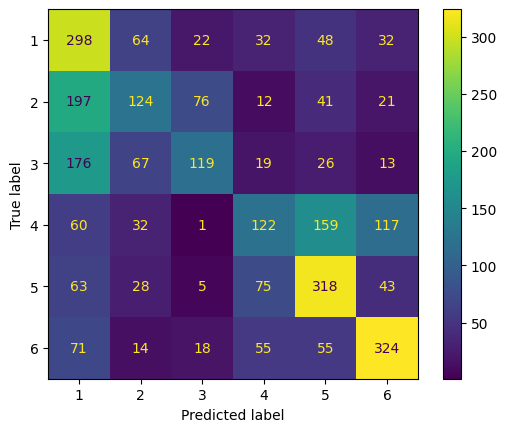

In [21]:
clf_2 = DecisionTreeClassifier(random_state=42,
                               ccp_alpha=melhor_ccp_2
                              ).fit(X_train, y_train)
print(pd.DataFrame(data=clf_2.get_params(),
                   index=pd.Index(data=['Valor'],
                                  name='Parâmetro')
                  ).T,
      '\n')

print('Acurácia da árvore na base de testes:',
      clf_2.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf_2,
                                      X=X_test,
                                      y=y_test)
plt.show()